## About the dataset

This is the official survey form for the 2017 Candy Hierarchy. All data collected is anonymous and will be shared with the public as a raw spreadsheet (xml) file. This data is not intended for research purposes, but rather for the writing of a satirical/humour creative non­fiction science piece to be published at BoingBoing.

## About the dataset

    General Questions related to the existence of
    missing values?
    wrong datatypes for columns?
    complete duplicates in the data?
    outliers in each column?
    changed the column names?
    wrong range of values?
    columns dropped it?
 

    Questions raised during analysis
    Most people going out or not?
    What is most common gender?
    What is mean of people age did the survey?
    What is most nationality of people did the survey?
    What is most dress color people prefer that?
    What is day most people prefer that?
    What is most website checked out?
    What is the most loved candy?
    What is the most hated candy?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from fuzzywuzzy import process,fuzz

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

#Remove Warning
import warnings
warnings.filterwarnings('ignore', category = UserWarning, module ='openpyxl')

C:\Users\Admin\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# read dataset

candyData = pd.read_excel("candyhierarchy2017.xlsx")

In [3]:
# see random 4 rows 

candyData.sample(4)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
81,90273016,No,Male,38,USA,DC,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(88, 41)"
723,90275763,No,I'd rather not say,34,Pittsburgh,Pittsburgh pa,JOY,JOY,MEH,JOY,...,Stupid selfish people,Japanese candy,Blue and black,NaN,Friday,NaN,NaN,NaN,NaN,NaN
1855,90282534,No,Male,42,USA,Maryland,MEH,DESPAIR,JOY,NaN,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(74, 33)"
1631,90281091,Yes,Female,22,USA,TX,MEH,MEH,JOY,NaN,...,NaN,NaN,White and gold,NaN,Sunday,NaN,NaN,1.0,NaN,"(11, 81)"


In [4]:
# see dimensions 

candyData.shape

(2460, 120)

**Interpretation:** The data has 2460 observations and 120 variables.

In [5]:
# Checking for Null Values

candyData.isna().sum() 

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [6]:
# check if duplicated

candyData.duplicated().any()

False

In [7]:
# see quick info of numeric values

candyData.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [8]:
# see quick info of category values 

candyData.describe(include = object)

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,"Click Coordinates (x, y)"
count,2350,2419,2376,2396,2360,1713,1726,1788,1502,1468,...,1703,1713,1755,911,717,386,1716,9,1735,1605
unique,2,4,106,128,511,3,3,3,3,3,...,3,3,3,867,685,385,2,1,2,952
top,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,...,DESPAIR,DESPAIR,JOY,Almond Joy,Trump,nom nom nom!,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,"(77, 24)"
freq,2038,1467,92,699,132,873,1089,1559,793,857,...,1455,1289,1105,10,7,2,1081,9,1091,9


**Interpretation:** The dataset has many empty values and there are no identical rows. We should get rid of unnecessary columns, change the data types of some columns and rename certain columns to prevent confusion.

In [9]:
# show columns that hase more 50 % nan value

for i in range(len(candyData.isnull().sum())):
    if candyData.isna().sum()[i] > 1229 :
        print(f"Column {candyData.isna().sum().index[i]} contains {candyData.isna().sum()[i]} nan value\n")

Column Q7: JOY OTHER contains 1549 nan value

Column Q8: DESPAIR OTHER contains 1743 nan value

Column Q9: OTHER COMMENTS contains 2074 nan value

Column Unnamed: 113 contains 2451 nan value

Column Q12: MEDIA [Daily Dish] contains 2375 nan value

Column Q12: MEDIA [ESPN] contains 2361 nan value

Column Q12: MEDIA [Yahoo] contains 2393 nan value



In [10]:
# drop columns we not used

candyData.drop(columns = ["Internal ID", "Unnamed: 113", "Click Coordinates (x, y)"], inplace = True)

In [11]:
# drop columns that contain more than 50 % nan value

candyData.drop(columns=["Q7: JOY OTHER", "Q8: DESPAIR OTHER", "Q9: OTHER COMMENTS"],inplace= True)

In [12]:
# handle columns name

# 1- create dictionary key is old name and value is new name
newNames = {"Q1: GOING OUT?" :"going out", "Q2: GENDER": "gender", "Q3: AGE": "age", "Q4: COUNTRY": "country",
            "Q10: DRESS" : "dress", "Q12: MEDIA [Science]":"Science","Q11: DAY": "day", "Q12: MEDIA [Daily Dish]":"Daily Dish",
            "Q12: MEDIA [ESPN]":"ESPN", "Q12: MEDIA [Yahoo]":"Yahoo"}

# 2- rename columns
candyData.rename(columns = newNames, inplace= True)

In [13]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = candyData[x_axis].value_counts().iloc[:top].index
        
    else : # if we neet to visualized in y-axis
        order = candyData[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = candyData, hue = hue, order = order)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [14]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it 
    2) output : circle chart that shows size of each unique values and percentage 
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * candyData[column_name].nunique()
    
    # Check and set explodeIndex value 
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
    
    # Create pie plot
    plt.pie(candyData[column_name].value_counts(), labels = candyData[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

In [15]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(x = x_axis, y = y_axis, data = candyData)
    plt.xlabel(x_axis)
    plt.show()

In [16]:
# show unique values

candyData["going out"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [17]:
# see number of missing values 

candyData["going out"].isna().sum()

110

In [18]:
# fill nan value with maybe (yse,no)

candyData["going out"].fillna("MayBe",inplace = True)

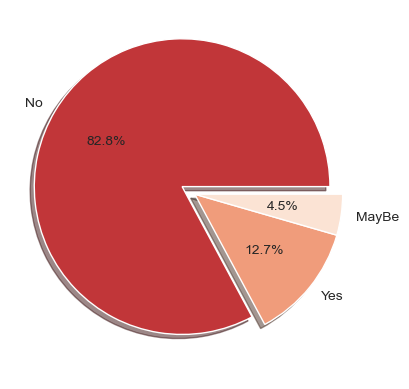

In [19]:
# visualized going out column using pie plot function i create it in cell 15

pie_plot(column_name = "going out", explodeIndex = 0)

**Interpretation:** Most people are not going outside much.

In [20]:
# show unique values

candyData["gender"].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [21]:
# see number of missing values 

candyData["gender"].isna().sum()

41

In [22]:
# fill missing values 

candyData["gender"].fillna("Other", inplace = True)

In [23]:
# replace Other with I'd rather not say

candyData["gender"].replace("I'd rather not say", "Other", inplace = True)

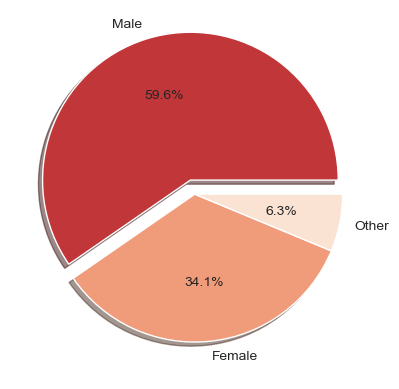

In [24]:
# visualized gender column using pie plot function i create it in cell 15

pie_plot(column_name = "gender", explodeIndex = 0)

In [25]:
# show unique values

candyData["age"].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [26]:
# convert column data type to numiric and replace non-digits to NAN value

candyData['age'] = pd.to_numeric(candyData["age"], errors = "coerce")

In [27]:
# show how many nan value 

candyData["age"].isna().sum()

108

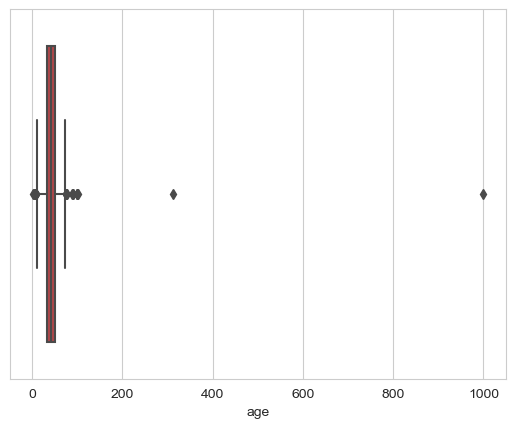

In [28]:
# show summary statistic

box_plot(x_axis = "age") # box plot function i create it in cell 16

In [29]:
# fixed outlier

Q1, Q3 = candyData["age"].quantile(0.25), candyData["age"].quantile(0.75)

IQR = Q3 - Q1

Upper = Q3 + (1.5 * IQR)
Lower = Q1 - (1.5 * IQR)

# replace out of range with nan value
candyData.loc[(candyData["age"] > Upper) | (candyData["age"] < Lower), "age"] = np.nan

In [30]:
# fill nan value with median

median = candyData["age"].median()
candyData["age"].fillna(median, inplace = True)

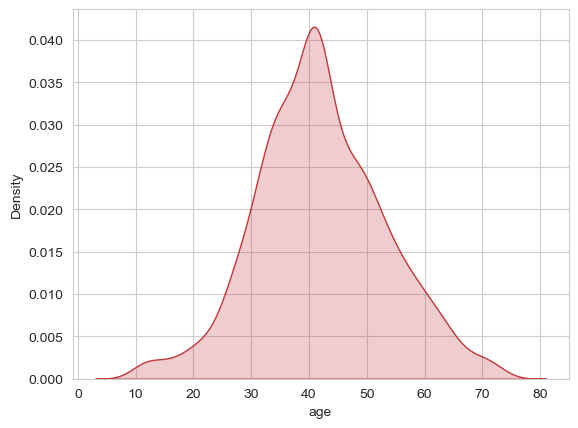

In [31]:
# see distribution

sns.kdeplot(x = "age", data = candyData, fill = True)
plt.show()

**Interpretation:** The majority of people who took the survey were in the age range of 35 to 50.

In [32]:
# show unique values

candyData["country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [33]:
# fixed some errors

# 1- convert all value to lower case
candyData["country"] = candyData["country"].str.lower()

# 2- remove extra spaces 
candyData["country"] = candyData["country"].str.strip()

In [34]:
# show how many nan value 

candyData["country"].isna().sum() 

69

In [35]:
# fill nan value

candyData["country"].fillna("Other", inplace = True)

In [36]:
# show again unique value

candyData["country"].unique()

array(['Other', 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jers

In [37]:
countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands',
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa',
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])

for country in countries:
    matches = process.extract(country, candyData['country'], limit = candyData.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            candyData.loc[candyData['country'] == potential_match[0], 'country'] = country

In [38]:
# show unique values again

candyData["country"].unique()

array(['Other', 'usa', 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'u.k.', 'costa rica', 'cascadia', 'australia', 'insanity lately',
       'greece', 'usa? hard to tell anymore..', 'pittsburgh', 'canae',
       'new york', 'trumpistan', 'iceland', 'south korea', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'ud', 'new jersey', 'indonesia', 'endland', 'atlantis', 'murrika',
       'alaska', 'soviet canuckistan', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [39]:
mapping = {'murica':'usa', 'united states of america':'usa','america':'usa', 'u.s.a.':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa'}
candyData['country'] = candyData['country'].replace(mapping)

In [40]:
# show unique values again

candyData["country"].unique()

array(['Other', 'usa', 'canada', 'uk', 'uae', 'mexico', 'france',
       'finland', 'netherlands', 'germany', 'europe', 'earth',
       'costa rica', 'australia', 'insanity lately', 'greece', 'canae',
       'iceland', 'south korea', 'japan', 'south africa', 'scotland',
       'denmark', 'switzerland', 'indonesia', 'atlantis', 'murrika',
       'alaska', 'singapore', 'china', 'taiwan', 'hong kong', 'spain',
       'sweden', 'narnia', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [41]:
candyData.country[~candyData['country'].isin(['usa', 'uk','canada'])] = 'other'

C:\Users\Admin\AppData\Local\Temp\ipykernel_9260\3281192361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candyData.country[~candyData['country'].isin(['usa', 'uk','canada'])] = 'other'


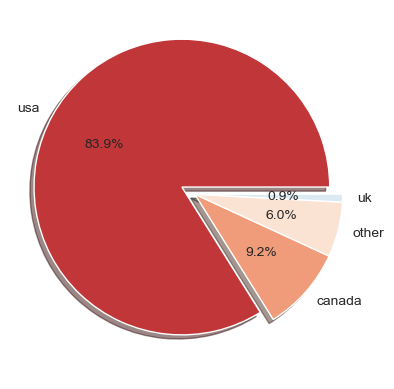

In [42]:
# visualized country column

pie_plot(column_name = "country", explodeIndex = 0)

**Interpretation:** Many people from the USA and Canada.

In [43]:
# show unique values

candyData["dress"].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [44]:
# see number of missing values 

candyData["dress"].isna().sum()

744

In [45]:
# fill nan value

candyData["dress"].fillna("Other colors", inplace = True)

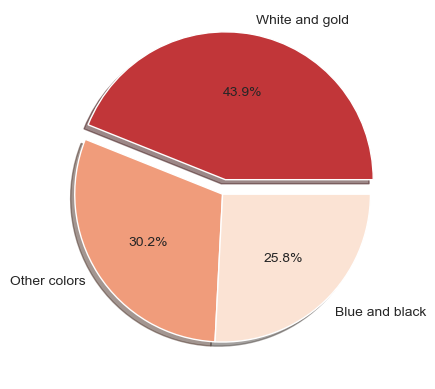

In [46]:
# visualized dress column

pie_plot(column_name = "dress", explodeIndex = 0)

**Interpretation:** Many people enjoy wearing clothes that are white and gold.

In [47]:
# show unique values

candyData["day"].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [48]:
# see number of missing values 

candyData["day"].isna().sum()

725

In [49]:
# fill nan value 

candyData["day"].fillna("Other Day", inplace = True)  

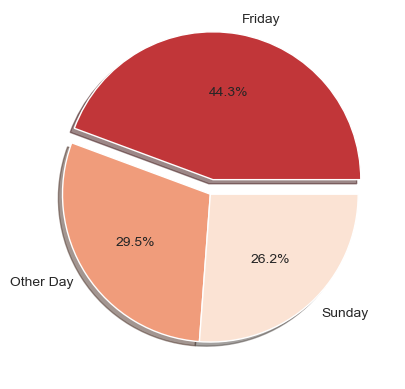

In [50]:
# visualized day column

pie_plot(column_name = "day", explodeIndex = 0)

**Interpretation:** Many people like Friday the most.

In [51]:
# create sub dataframe media

media = candyData[candyData.columns[-4:]]
media

,Daily Dish,Science,ESPN,Yahoo
0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN
...,...,...,...,...
2455,NaN,NaN,NaN,NaN
2456,NaN,1.0,NaN,NaN
2457,NaN,1.0,NaN,NaN
2458,NaN,NaN,NaN,NaN


In [52]:
# fill nan value with No 

media = media.fillna("NO")

In [53]:
# Show most website checked out

# 1- craate list of media category
media_category = ["Science", "ESPN", "Daily Dish", "Yahoo"]

# 2- create dictionary key is media category and value is number of ones
media_used = {}

# 3- loop of list madie to get number of ones
for category in media_category:
    media_used[category] = len(candyData[candyData[category] == 1.0])
    
# 4- calculation number of No answer 
media_used["No answer"] = candyData.shape[0] - sum(media_used.values())

# 5- sorte media_used by values
media_used = dict(sorted(media_used.items(), key = lambda item : item[1] ,reverse = True))

# 6- get all keys in media_used
keys = list(media_used.keys())

# 7- get all values in media_used
values = list(media_used.values())

In [54]:
# create media column and fill with nan value

candyData["media"] = np.nan

In [55]:
# fill nan value using media used dictionary

for key,value in media_used.items():
    candyData["media"].fillna(key,limit = value, inplace = True)

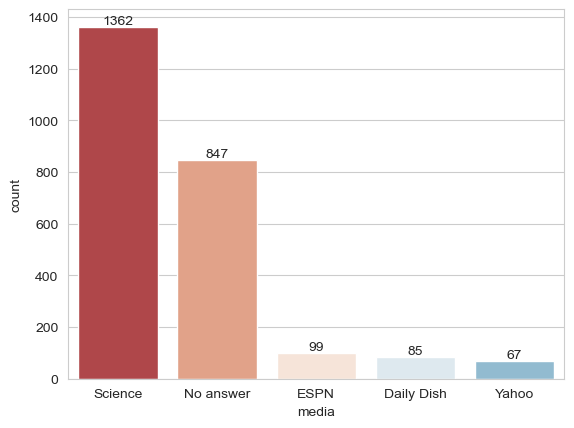

In [56]:
# visualized media column

count_plot(x_axis = "media")

**Interpretation:** Many people visit the science website the most.

In [57]:
# 1- create list of Question columns 
Question = [candy for candy in candyData.columns if 'Q6' in str(candy)]

# 2- create dataframe call candy
candy = pd.DataFrame(candyData[Question])

In [58]:
# show sample of dataframe

candy.sample(5)

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
437,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,...,MEH,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,MEH,JOY
68,JOY,DESPAIR,JOY,MEH,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,...,JOY,MEH,MEH,MEH,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH
448,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,...,JOY,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,JOY
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,...,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH


In [59]:
# see dimensions 

candy.shape

(2460, 103)

In [60]:
# show how many nan value in each column

candy.isna().sum()

Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
Q6 | Bonkers (the candy)                                                                  992
                                                                                         ... 
Q6 | Vicodin                                                                              789
Q6 | Whatchamacallit Bars                                                                 823
Q6 | White Bread                                                                          757
Q6 | Whole Wheat anything                                                                 747
Q6 | York Peppermint Patties                                

**Interpretation:** We have some empty values that we need to replace with something else. Also, we want to change the names of some columns to make things clearer and avoid confusion.

In [61]:
# fill nan value 

candy.fillna("unknown", inplace = True)

In [62]:
# handle candy columns name

# 1- create  dictionary key is old name and value is new name of each column
names = {}

# 2- loop over columns to fixed name and store old and new name in names
for col in candy.columns:
    names[col] = col.strip("Q6 | ")
    
# 3- rename columns
candy.rename(columns = names, inplace= True)

In [63]:
candy.sample(3)

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
795,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
249,MEH,MEH,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
999,MEH,DESPAIR,MEH,MEH,MEH,MEH,MEH,MEH,MEH,JOY,...,JOY,MEH,MEH,JOY,MEH,JOY,JOY,MEH,MEH,JOY


In [64]:
# handle candy columns

def visualizing(reversed):
    # 1- create create dictionary key is Question and value is number of ones
    candy_score = {}

    # 2- loop over columns to get number of ones of each column
    for column in candy.columns:
        candy_score[column] = len(candy[candy[column] == "JOY"])

    # 3- sorte candy_score by values
    candy_score = dict(sorted(candy_score.items(), key = lambda item : item[1] ,reverse = reversed))

    # 4- get all keys in candy_score
    keys = list(candy_score.keys())

    # 5- get all values in candy_score
    values = list(candy_score.values())
    
    # 6- visualizing columns
    sns.barplot(y = keys[:5], x = values[:5])
    plt.title("Candy distirbution")
    plt.xlabel("Count"); plt.ylabel("Candy")
    plt.xticks(rotation = 55)
    plt.show()

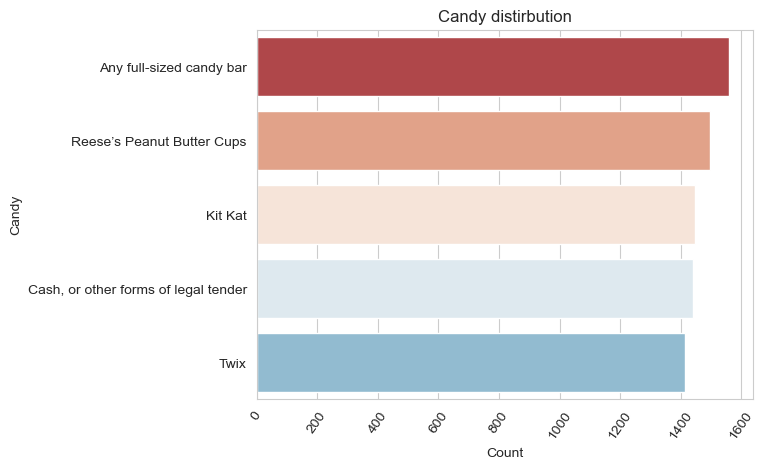

In [65]:
# Top five favorite candy

visualizing(True)

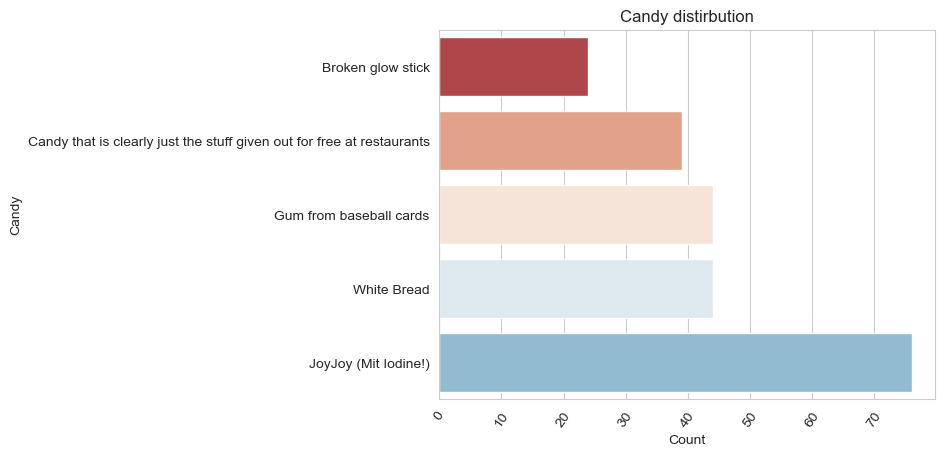

In [66]:
# First five hated candy

visualizing(False)

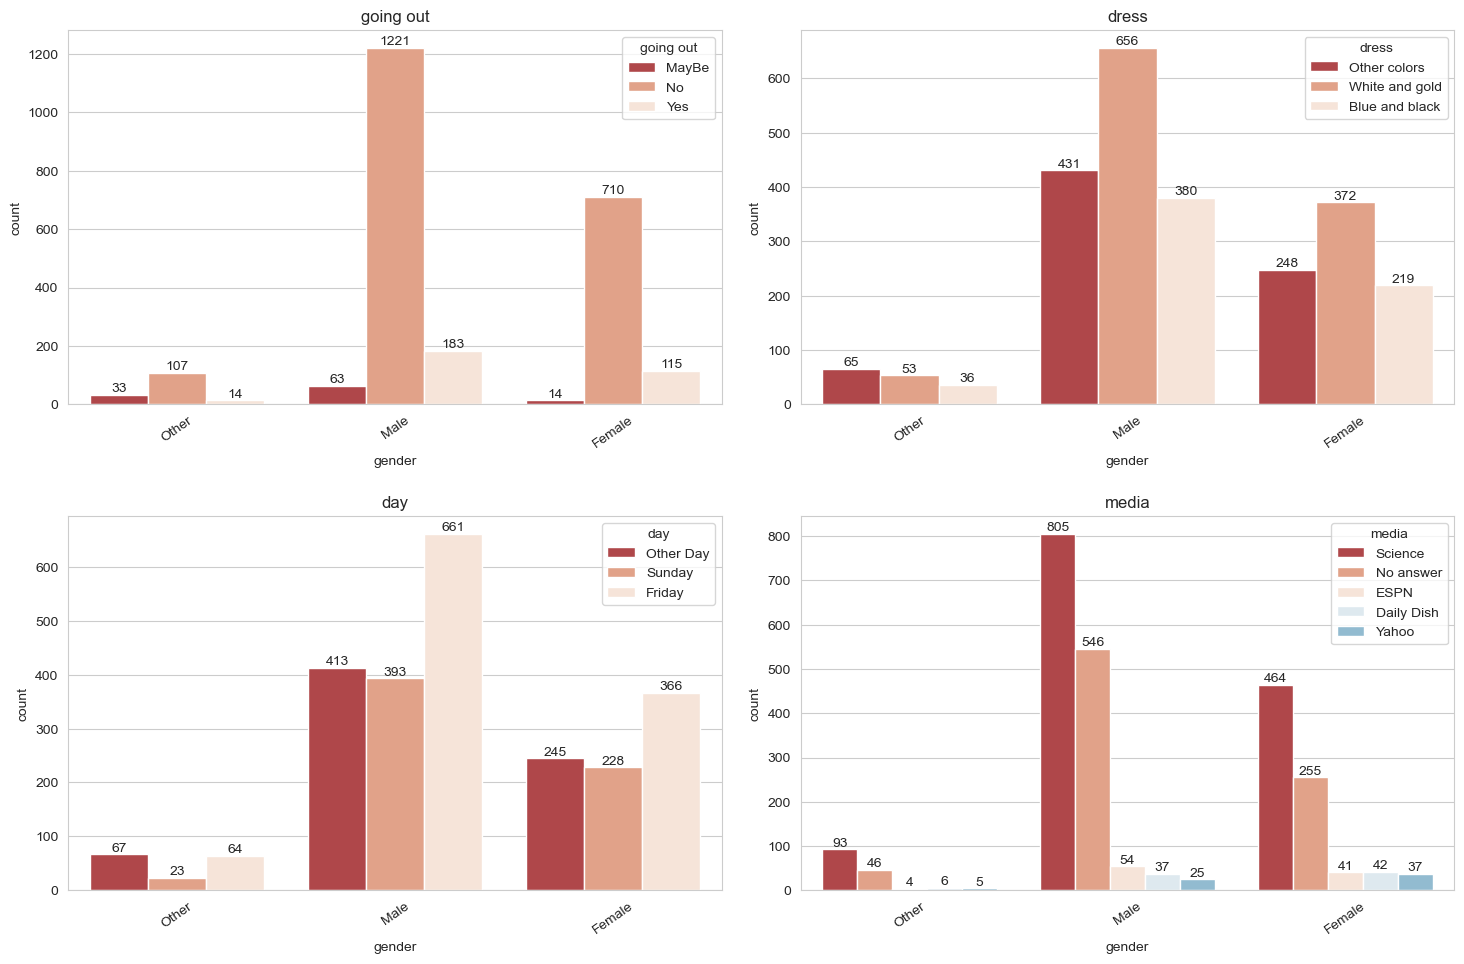

In [67]:
# create list of columns
catColumns = ["going out", "dress", "day", "media"]

# 1- set figure size
plt.figure(figsize=(15, 10))

# 2- loop over objcolumns list to plot columns
for index, col in enumerate(catColumns):
    plt.subplot((len(catColumns) + 1) // 2, 2, index + 1)
    graph = sns.countplot(x = "gender", data = candyData, hue = col)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.title(col) # set title to each plot
    plt.xticks(rotation = 35)
    
# 3- set layout between two plots
plt.tight_layout(pad = 2)
plt.show()

**Conclusion:** Many people are staying home these days. Among those surveyed, more men participated. Most people who took part in the survey were between 35 and 50 years old. The majority of respondents were from the USA and Canada. White and gold attire is a popular choice. Friday is the preferred day for most people. When it comes to websites, science-related ones are visited the most. Full-sized candy bars are the favorite, while broken glow sticks are the least liked.

**Summary:** I wanted to tidy up the data by fixing any missing information or copies. While doing that, I found out which candy is liked the most and least, the favorite day, people's opinions on a dress and the preferred social media site. The survey was mostly done by males with many staying indoors. On average, the participants were around 42 years old and most of them were from the United States.